### Import all the necessary libraries required.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date
import plotly.express as px

### Load the dataset.

In [2]:
df = pd.read_csv("autos.csv",encoding="latin-1")

## Exploratory Data Analysis

### Then, check the number of rows and columns that are in this dataset.

In [3]:
df.shape

(50000, 20)

####  We can see that our data has 50,000 rows and 20 columns.

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### We can get concise summary of the dataset with df.info() method.

This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

From what we know of the DataFrame so far, we can make the following observations:
- The dataset contains 20 columns, most of which are strings.
- The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores.
- Some columns have null values.

Let's convert the column names from camelcase to snakecase and reword some of the column names to be more descriptive.

#### Interpretation
We can see that there are a lot of descrepancies in the dataset.

For example, registration date of the cars contains data into two different columns "yearOfRegistration" & "monthOfRegistration" column. Then there are grammatical errors in columns like "gearbox" and some of the data is in german language.Also, there is a column with PferdStarke as the power measure for cars instead of Horse power.

### Checking the name of columns.
Here we can check for errors in column names and then rectify it.

In [6]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
def cleaned_cols(col):
    col = col.replace('yearOfRegistration','registration_year')
    col = col.replace('monthOfRegistration','registration_month')
    col = col.replace('notRepairedDamage','unrepaired_damage')
    col = col.replace('dateCreated','ad_created')
    # Change the rest of the column names from camelcase to snakecase
    col = re.sub( '(?<!^)(?=[A-Z])', '_', col ).lower()
    return col

df.columns = [cleaned_cols(c) for c in df.columns]

df.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_p_s', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

### We can check the data types of each column in the DataFrame with this attribute.
The below command returns the data types of each column.

In [8]:
df.dtypes

date_crawled          object
name                  object
seller                object
offer_type            object
price                 object
abtest                object
vehicle_type          object
registration_year      int64
gearbox               object
power_p_s              int64
model                 object
odometer              object
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
nr_of_pictures         int64
postal_code            int64
last_seen             object
dtype: object

### Interpretation

Also, we can see from previewing the data that the price and odometer columns are numeric values stored as text so we'll deal with these columns by:
- Removing any non-numeric characters.
- Convert the column to a numeric dtype.

### We can view the summary statistics of numerical column.
It enables us to detect outliers in the data which require further investigation.

In [9]:
df.describe()

,registration_year,power_p_s,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


From the descriptive statistics table above, there are a number of things worth noting:
- the 'nr_of_pictures' column can be dropped as none of the rows have any pictures.
- There are some rows of data in the 'registration_year' column that can be removed as the table contains a min and max value of 1000 and 9999 which is highly impropable for the vehicle registrations.
- The max in 'power_p_s' column is significantly more than the value at 75% which suggest some inaccurate data in this column.
- The minimum in the 'registration_month' column is 0 which is not possible, so this also suggests inaccurate rows of data.

In [10]:
df['price'].head()

0    $5,000
1    $8,500
2    $8,990
3    $4,350
4    $1,350
Name: price, dtype: object

In [11]:
def convert_price(column):
    if pd.isnull(column) == True:
        return None
    else:
        string = column.split(' ')[0]
        string = string.replace('$','')
        string = string.replace(',','')
        return int(string)
    
price = df['price'].apply(convert_price)
df['price'] = price
df['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [12]:
df['odometer'].head()

0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer, dtype: object

In [13]:
def convert_odometer(column):
    if pd.isnull(column) == True:
        return None
    else:
        string = column.split(' ')[0]
        string = string.replace(',','')
        string = string.replace('km','')
        return int(string)
    
odometer = df['odometer'].apply(convert_odometer)
df['odometer'] = odometer
df['odometer'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int64

In [14]:
# Rename odometer to odometer_km and price to price_$ to be more descriptive
df = df.rename(columns = {'odometer':'odometer_km'})
df = df.rename(columns = {'price':'price_$'})

In [15]:
# Now we drop the rows that won't be required for any analyis
df = df.drop(["nr_of_pictures", "seller", "offer_type"], axis=1)

Let's keep analyzing the odometer and price column data

In [16]:
print(df['odometer_km'].unique().shape)
print(df['odometer_km'].describe())
print(df['odometer_km'].value_counts())

(13,)
count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64


There are 13 unique rows of data for the odometer_km column. From our obseration we can clearly see that the odometer reading tends to be on the higher side for cars in this dataset. There doesnt seem to be any unrealistically high or low outliers from this column.

In [17]:
print(df['price_$'].unique().shape)
print(df['price_$'].describe())
print(df['price_$'].value_counts().head(15))

(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price_$, dtype: float64
0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
Name: price_$, dtype: int64


We can see that there are 1421 rows of cars with a price of \$0 which seems unlikely. This value makes up ~2.8% of the data so we should be able to safely remove these rows of data. The maximum price we observe in the data is \$100,000,000, we will need to further examine the higher prices of this column

In [18]:
df['price_$'].value_counts().sort_index(ascending = False).head(15)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
Name: price_$, dtype: int64

In [19]:
df['price_$'].value_counts().sort_index(ascending = True).head(15)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
Name: price_$, dtype: int64

When looking at the high price range for the column we can see that there is a significant jump up from $350,000 to $999,990 when compared to the steady increase in orices before it. Therefore it is safe to remove any data that is greater than $350,000.

We can also see that there are a number of prices below $18. It would be safe to keep the $1 prices in our DataFrame as we know eBay is an auction site and there can be starting bids of $1.

In [20]:
df = df[df['price_$'].between(1, 350000)]
df['price_$'].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price_$, dtype: float64

There are a number of columns that represent date values:
- date_crawled
- last_seen
- ad_created
- registration_month
- registration_year

In the DataFrame date_crawled, last_seen and ad_created are columns that are all represented by strings. These will need to be converted to numeric representation so we can analyse it. The registration_month and registration_year columns are already represented as numeric values.

First let's see how the values in these three string columns are formatted.

In [21]:
df[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [22]:
# We are just looking for the dates so we'll take the first 10 characters in each column
(df['date_crawled']
        .str[:10]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
        )

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

We can see that there is uniformity in the distribution of the listings crawled daily. 

In [23]:
(df['ad_created']
        .str[:10]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
        )

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

We can see the majority of the ads created was within a similar time frame as the crawling dates. The lower frequency of ads created prior to these dates are understandable as once the sales have been completed, the ads can be delisted and won't appear on the website prior to the dates recorded by the crawler

In [24]:
(df['last_seen']
        .str[:10]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
        )

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

There is a spike seen in the distribution for the last three days for the 'last_seen' column. This last_seen column tells us of when an ad has been delisted from the site, most likely due to a sale. This high distribution observed during the last 3 days of the crawler recording is most likely not due to a drastic increase in sales as the days prior to these had a roughly similar distribution. 

As we previously mentioned, there are rows in the registration_year column that are incorrect such as the minimum value of 1000, before cars were invented, and a maximum value of 9999, many years in the future. 

We can safely remove any rows with registration years greater than 2016 as this will be definitely inaccurate. To determine the earliest period for the registration of the car is difficult as it could be anywhere during the beginning of the 20th century. To be on the safe side we can see what percentage of vehicles hav registration years outside of 1900 to 2016 and determine if it is a significant number.

In [25]:
(df['registration_year'].between(1900,2016)).sum() / df.shape[0]

0.961206630289303

In [26]:
df = df[df['registration_year'].between(1900, 2016)]
df['registration_year'].value_counts(normalize = True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

We can see that the majority of cars listed in this data were registered in the last 20 years.

Now we'll explore the price of the cars on offer by their brands.

In [27]:
df['brand'].value_counts(normalize = True)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

German manufacturers make up the top 5 brands for the cars in the sales data with Volkswagen being the most popular, with approximately double the cars than the next two manufacturers combined.

We'll limit our analysis to brands that make up more than 5% of the total sales data.

In [28]:
brands = df['brand'].value_counts(normalize = True)
most_common_brands = brands[brands > 0.05].index
most_common_brands

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [29]:
brands_mean_price = {}

for brands in most_common_brands:
    brand_only = df[df['brand'] == brands]
    mean_price = brand_only['price_$'].mean()
    brands_mean_price[brands] = int(mean_price)
    
brands_mean_price

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

We can see that there is a price gap between the top 5 brands in the sales data. We can see that cars manufactured by Audi, BMW and Mercedes Benz tend to be priced higher than the competition. Opel is the least expensive of the top 5 brands while Volkswagen is in between. This could be one of the reasons for the popularity of Volkswagen cars. 

We can use a similar method to obtain the average mileage for those cars and then see if there's any link with the mean price. We'll combine both these series objects into a single dataframe, with a shared index, so we can easily compare the two.

In [30]:
brand_mean_mileage = {}

for brands in most_common_brands:
    brand_only = df[df['brand'] == brands]
    mean_mileage = brand_only['odometer_km'].mean()
    brand_mean_mileage[brands] = int(mean_mileage)
    
brand_mean_mileage

{'volkswagen': 128707,
 'bmw': 132572,
 'opel': 129310,
 'mercedes_benz': 130788,
 'audi': 129157,
 'ford': 124266}

In [31]:
mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending = False)
mean_price = pd.Series(brands_mean_price).sort_values(ascending = False)

In [32]:
top_brand_info = pd.DataFrame(mean_mileage, columns = ['mean_mileage'])
top_brand_info

,mean_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [33]:
top_brand_info['mean_price'] = mean_price
top_brand_info

,mean_mileage,mean_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


We can see that the car mileage doesn't vary as much as the prices. We can see that the more expensive brands generally tend to have higher mileage with the only outlier being Opel.

Let's continue to clean up the data. To do this we'll indentify the categorical data that uses german words and translate and map the values to thir english counterparts.

#### The dataset contains a lot of data in german language so I have changed those german names into english names

In [34]:
df

,date_crawled,name,price_$,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


In [35]:
df['gearbox'] = df['gearbox'].replace(['manuell','Automatik'],['Manual','Automatic'])

df['unrepaired_damage'] = df['unrepaired_damage'].replace(['Nein','Ja'],['No','Yes'])

df['fuel_type'] = df['fuel_type'].replace(['Benzin','Andere','Elektro'],['Petrol','Other','Electric'])


df['name'] = df['name'].replace(['_'],' ')

df['vehicle_type'] = df['vehicle_type'].replace(['Andere'],'Other')

## Visualizing the data.

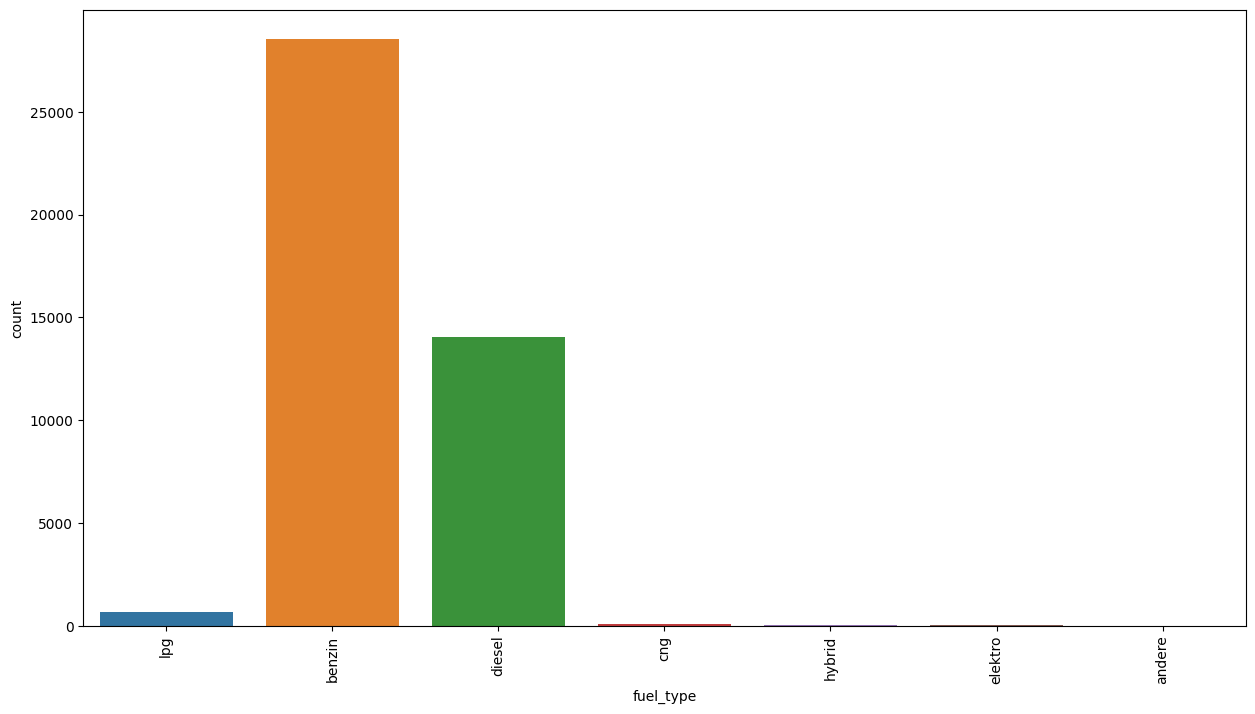

In [36]:
plt.figure(figsize = (15,8))

sns.countplot(data = df , x='fuel_type')
plt.xticks(rotation=90)
plt.show()

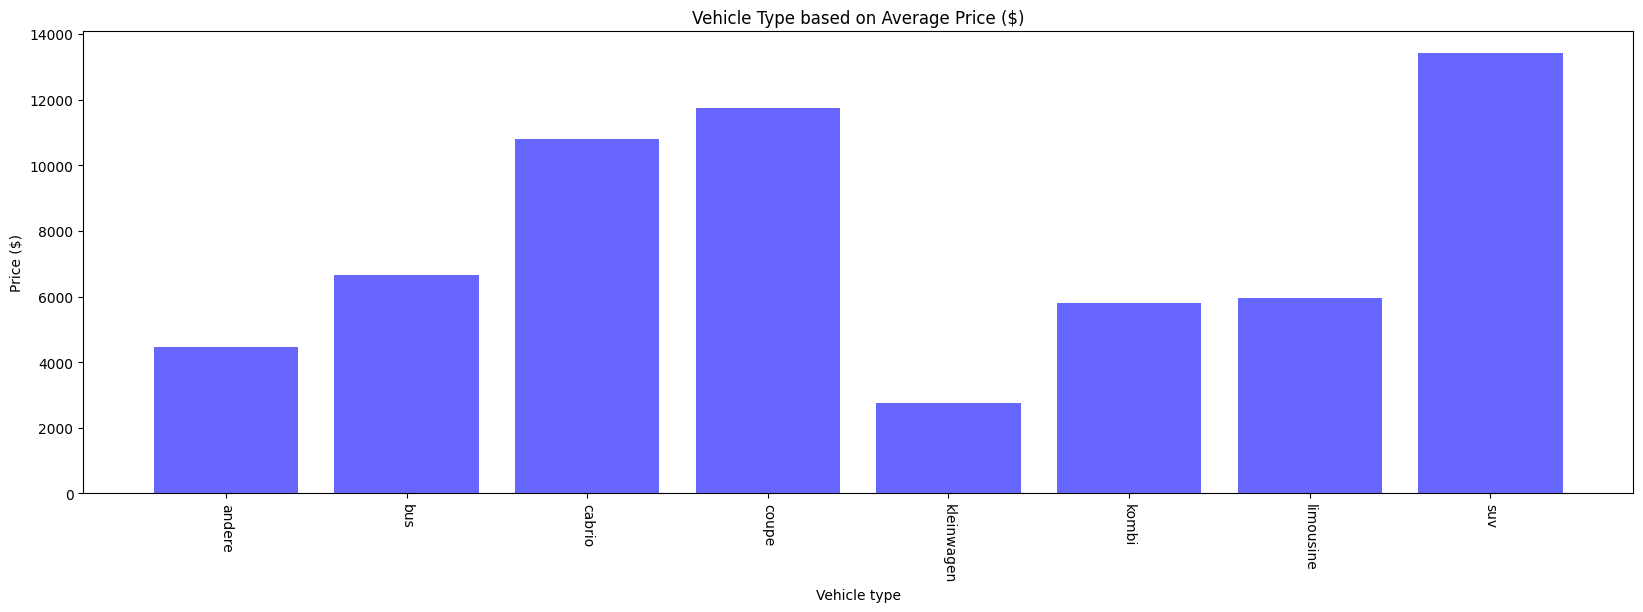

In [37]:
fig, ax= plt.subplots(figsize=(20,6))
grouped_data = df.groupby('vehicle_type')['price_$'].mean().reset_index()


plt.bar(grouped_data['vehicle_type'], grouped_data['price_$'],color='blue',alpha=0.6)

plt.xlabel('Vehicle type')
plt.xticks(rotation=270)
plt.ylabel('Price ($)')
plt.title('Vehicle Type based on Average Price ($)')
plt.show()

### Interpretation

From the graph we can see that people prefer "Limousine","Kleinwagen" & "Kombi" as used cars. While very few people prefer "SUV,"Coupe" as used cars.

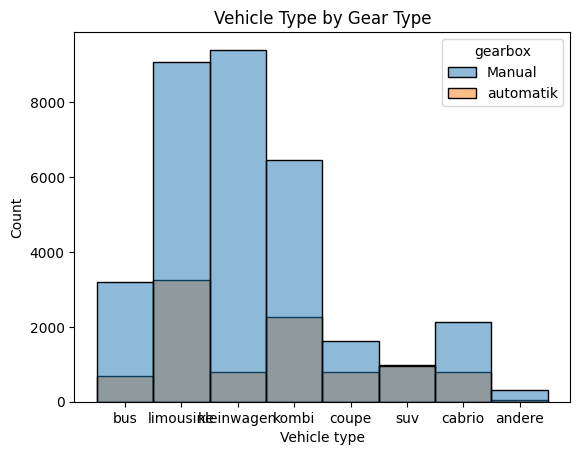

In [38]:
plt.title("Vehicle Type by Gear Type")
sns.histplot(x="vehicle_type",hue='gearbox', data = df)
plt.xlabel('Vehicle type')
plt.ylabel('Count')
plt.show()

#### Interpretation

From the graph we can observe that people prefer Manual Gear

<AxesSubplot: xlabel='abtest', ylabel='count'>

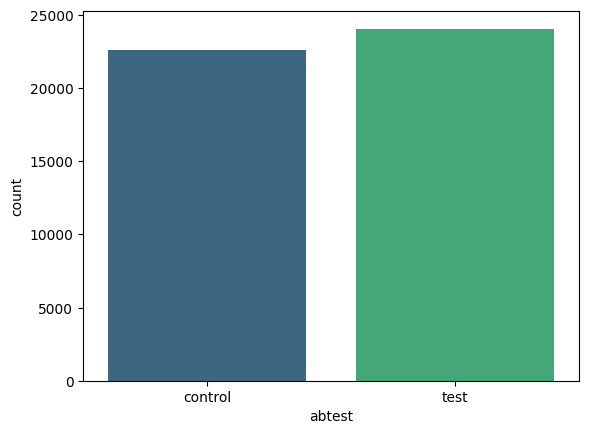

In [39]:
df['abtest'] =df['abtest'].astype('category')

sns.countplot(data =df, x='abtest', palette= 'viridis')

<AxesSubplot: xlabel='unrepaired_damage', ylabel='count'>

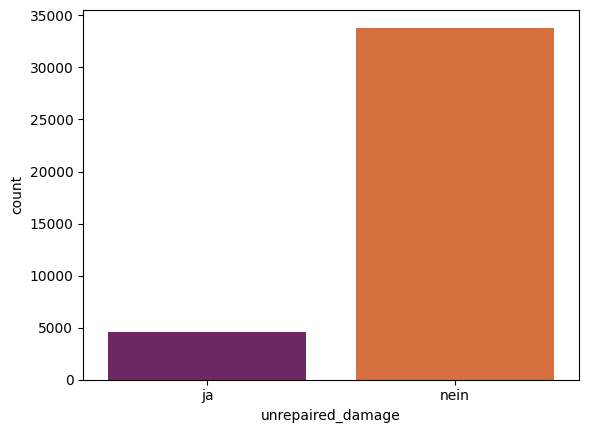

In [40]:
df['unrepaired_damage'] =df['unrepaired_damage'].astype('category')

sns.countplot(data =df, x='unrepaired_damage', palette= 'inferno')

No let's investigate wether or not ther is a price discrepancy if cars that have been previously damaged compared to their non_damaged counterparts.

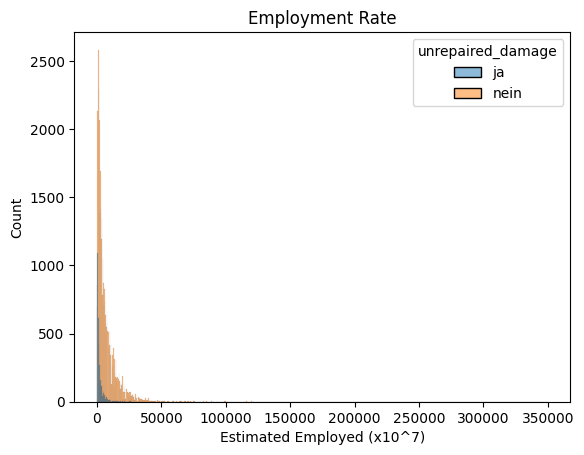

In [41]:
plt.title("Employment Rate")
sns.histplot(x="price_$",hue='unrepaired_damage', data = df)
plt.xlabel('Estimated Employed (x10^7)')
plt.ylabel('Count')
plt.show()

We can see that cars that have been previously damaged are considerable cheaper than those with no damage prior to their listing.

In [42]:
Cars = df[["brand","vehicle_type","price_$"]]
figure = px.sunburst(Cars, path=["vehicle_type","brand"],
                    values ="price_$",
                    width = 700, height = 700,color_continuous_scale="RdY1Gn",
                    title = "Cars by Brand Name, Vehicle Type & Price")

figure.show()

ValueError: ('None entries cannot have not-None children', vehicle_type           nan
brand           alfa_romeo
Name: 3282, dtype: object)